In [2]:
%pip install qualtran --quiet
%pip install stimcirq --quiet
%pip install stim --quiet
%pip install cirq --quiet
%pip install pymatching --quiet
%pip install stac --quiet
%pip install sinter --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cirq 1.3.0 requires cirq-core==1.3.0, but you have cirq-core 1.4.0.dev20240412172235 which is incompatible.
cirq-aqt 1.3.0 requires cirq-core==1.3.0, but you have cirq-core 1.4.0.dev20240412172235 which is incompatible.
cirq-ft 1.3.0 requires cirq-core==1.3.0, but you have cirq-core 1.4.0.dev20240412172235 which is incompatible.
cirq-google 1.3.0 requires cirq-core==1.3.0, but you have cirq-core 1.4.0.dev20240412172235 which is incompatible.
cirq-ionq 1.3.0 requires cirq-core==1.3.0, but you have cirq-core 1.4.0.dev20240412172235 which is incompatible.
cirq-pasqal 1.3.0 requires cirq-core==1.3.0, but you have cirq-core 1.4.0.dev20240412172235 which is incompatible.
cirq-rigetti 1.3.0 requires cirq-core==1.3.0, but you have cirq-core 1.4.0.dev20240412172235 which is incompatible.
cirq-web 1.3.0 requires cirq-core==

In [1]:
from qualtran import Register, QBit
import attrs
from qualtran import Bloq, Signature
import stimcirq
import stim

@attrs.frozen
class CNOT(Bloq):
    @property
    def signature(self):
        return Signature([
            Register('control', QBit()),
            Register('target', QBit()),
        ])

/opt/anaconda3/envs/steane/lib/python3.9/site-packages/cotengra/hyperoptimizers/hyper.py:33: UserWarning: Couldn't import `kahypar` - skipping from default hyper optimizer and using basic `labels` method instead.
  warnings.warn(


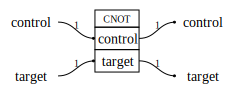

In [2]:
from qualtran.drawing import show_bloq

cnot = CNOT()
show_bloq(cnot)

In [3]:
@attrs.frozen
class H(Bloq):
    @property
    def signature(self):
        return Signature([
            Register('target', QBit()),
        ])

In [4]:
from qualtran import BloqBuilder
from qualtran.bloqs.basic_gates import CNOT, Hadamard
from qualtran import Bloq, Signature

@attrs.frozen
class Steane(Bloq):
    @property
    def signature(self):
        return Signature.build(q=7)

    def build_composite_bloq(self, bb: BloqBuilder, *, q):
        qs = bb.split(q)
        qs[0] = bb.add(Hadamard(), q=qs[0])
        qs[1] = bb.add(Hadamard(), q=qs[1])
        qs[2] = bb.add(Hadamard(), q=qs[2])
        qs[6], qs[4] = bb.add(CNOT(), ctrl=qs[6], target=qs[4])
        qs[6], qs[5] = bb.add(CNOT(), ctrl=qs[6], target=qs[5])
        qs[0], qs[3] = bb.add(CNOT(), ctrl=qs[0], target=qs[3])
        qs[1], qs[3] = bb.add(CNOT(), ctrl=qs[1], target=qs[3])
        qs[0], qs[5] = bb.add(CNOT(), ctrl=qs[0], target=qs[5])
        qs[2], qs[3] = bb.add(CNOT(), ctrl=qs[2], target=qs[3])
        qs[1], qs[4] = bb.add(CNOT(), ctrl=qs[1], target=qs[4])
        qs[0], qs[6] = bb.add(CNOT(), ctrl=qs[0], target=qs[6])
        qs[2], qs[4] = bb.add(CNOT(), ctrl=qs[2], target=qs[4])
        qs[1], qs[6] = bb.add(CNOT(), ctrl=qs[1], target=qs[6])
        qs[2], qs[5] = bb.add(CNOT(), ctrl=qs[2], target=qs[5])

        return {'q': bb.join(qs)}


In [5]:
from qualtran import BloqBuilder
from qualtran.bloqs.basic_gates import CNOT, Hadamard

class Steane(Bloq):
    @property
    def signature(self):
        return Signature.build(q1=1, q2=1, q3=1, q4=1, q5=1, q6=1, q7=1)


    def build_composite_bloq(self, bb: BloqBuilder, *, q1, q2, q3, q4, q5, q6, q7):
        q1 = bb.add(Hadamard(), q=q1)
        q2 = bb.add(Hadamard(), q=q2)
        q3 = bb.add(Hadamard(), q=q3)
        q7, q5 = bb.add(CNOT(), ctrl=q7, target=q5)
        q7, q6 = bb.add(CNOT(), ctrl=q7, target=q6)
        q1, q4 = bb.add(CNOT(), ctrl=q1, target=q4)
        q2, q4 = bb.add(CNOT(), ctrl=q2, target=q4)
        q1, q6 = bb.add(CNOT(), ctrl=q1, target=q6)
        q3, q4 = bb.add(CNOT(), ctrl=q3, target=q4)
        q2, q5 = bb.add(CNOT(), ctrl=q2, target=q5)
        q1, q7 = bb.add(CNOT(), ctrl=q1, target=q7)
        q3, q5 = bb.add(CNOT(), ctrl=q3, target=q5)
        q2, q7 = bb.add(CNOT(), ctrl=q2, target=q7)
        q3, q6 = bb.add(CNOT(), ctrl=q3, target=q6)
        return {'q1':q1, 'q2':q2, 'q3':q3, 'q4':q4, 'q5':q5, 'q6':q6, 'q7':q7}

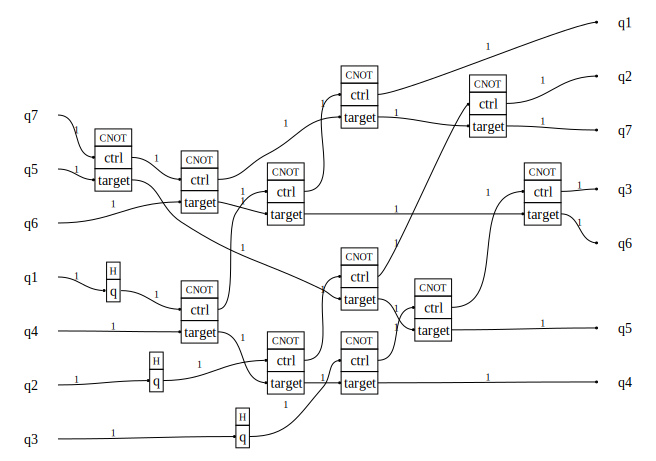

In [6]:
steane = Steane()
show_bloq(steane.decompose_bloq())

In [7]:
@attrs.frozen
class SteaneConcat(Bloq):

    @property
    def signature(self):
        return Signature.build(q=49)

    def build_composite_bloq(self, bb: BloqBuilder, *, q):
        qs = bb.split(q)

        for i in range(7):
          id = i * 7
          qs[id:id+7] = bb.add_from(
              Steane().decompose_bloq(),
              q=qs[id:id+7])

        return {
            'q': bb.join(qs)
        }

In [8]:

@attrs.frozen
class SteaneConcat(Bloq):
    n:int

    @property
    def signature(self):
        return Signature.build(q=self.n)

    def build_composite_bloq(self, bb: BloqBuilder, *, q):
        qs = bb.split(q)

        for i in range(self.n//7):
            id = i * 7
            q1, q2, q3, q4, q5, q6, q7 = qs[id:id + 7]
            q1, q2, q3, q4, q5, q6, q7 = bb.add_from(
                Steane().decompose_bloq(),
                q1=q1, q2=q2, q3=q3, q4=q4, q5=q5, q6=q6, q7=q7
            )
            qs[id:id + 7] = [q1, q2, q3, q4, q5, q6, q7]

        return {
            'q': bb.join(qs)
        }


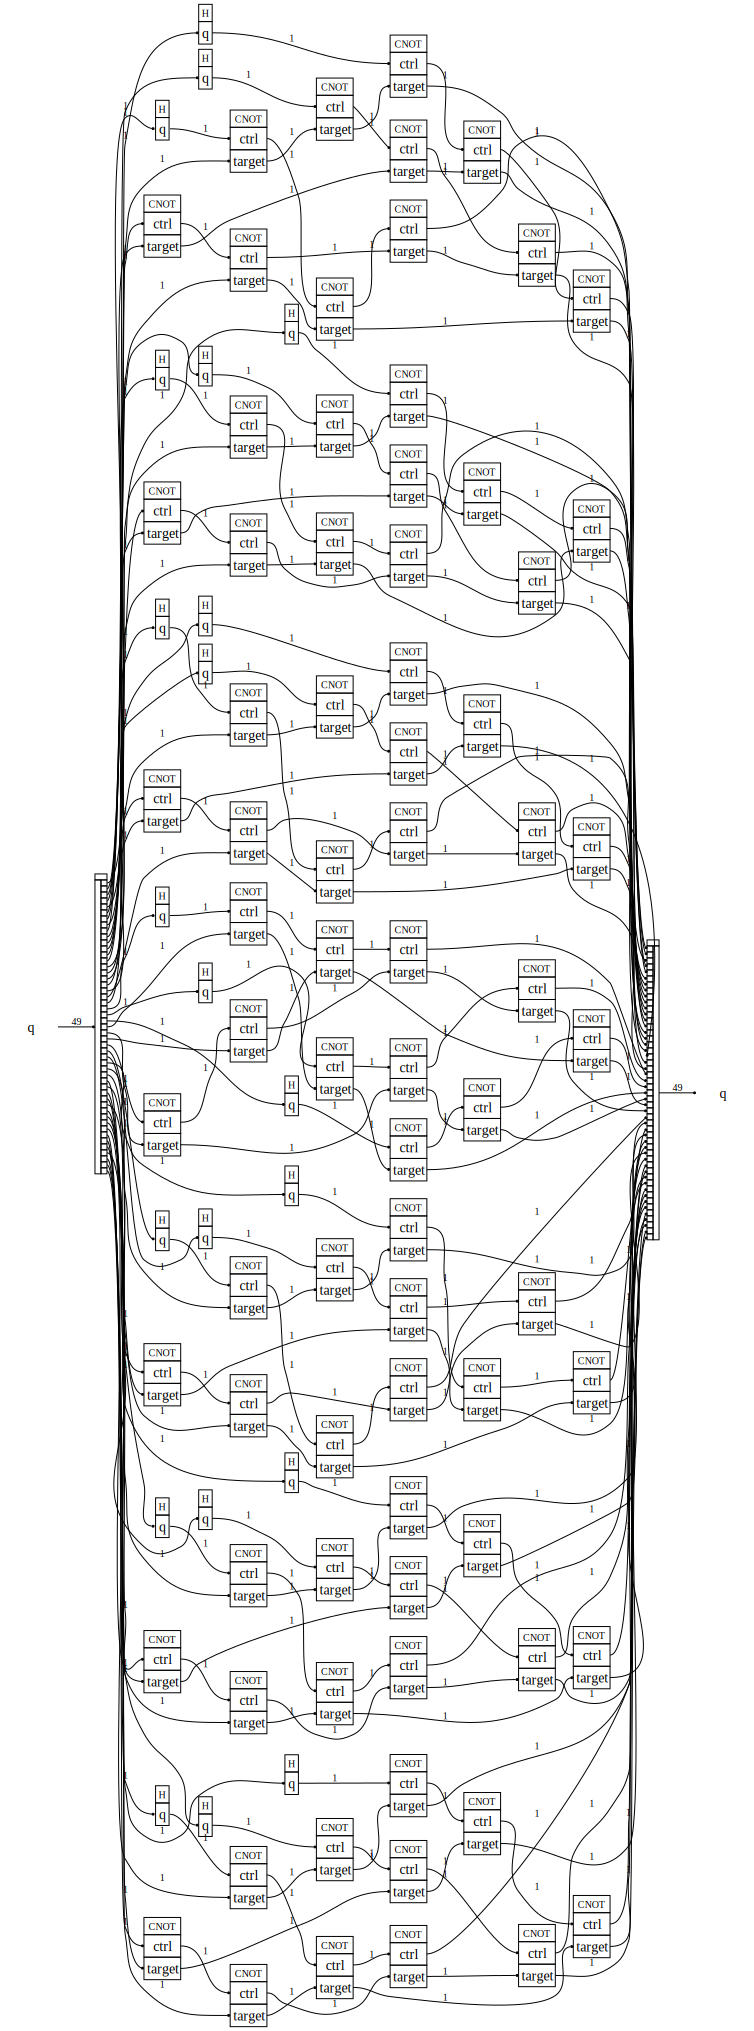

In [9]:
steane_cat = SteaneConcat(n=7*7)
steane_cat = steane_cat.decompose_bloq()
show_bloq(steane_cat)

In [10]:
xs = []
ysq = []
ysg = []
for i in range(1,5):
  steane_cat = SteaneConcat(n=pow(7,i)).decompose_bloq().bloq_counts()
  xs.append(i)
  ysq.append(pow(7,i))
  ysg.append(steane_cat.get(CNOT())+ steane_cat.get(Hadamard()))



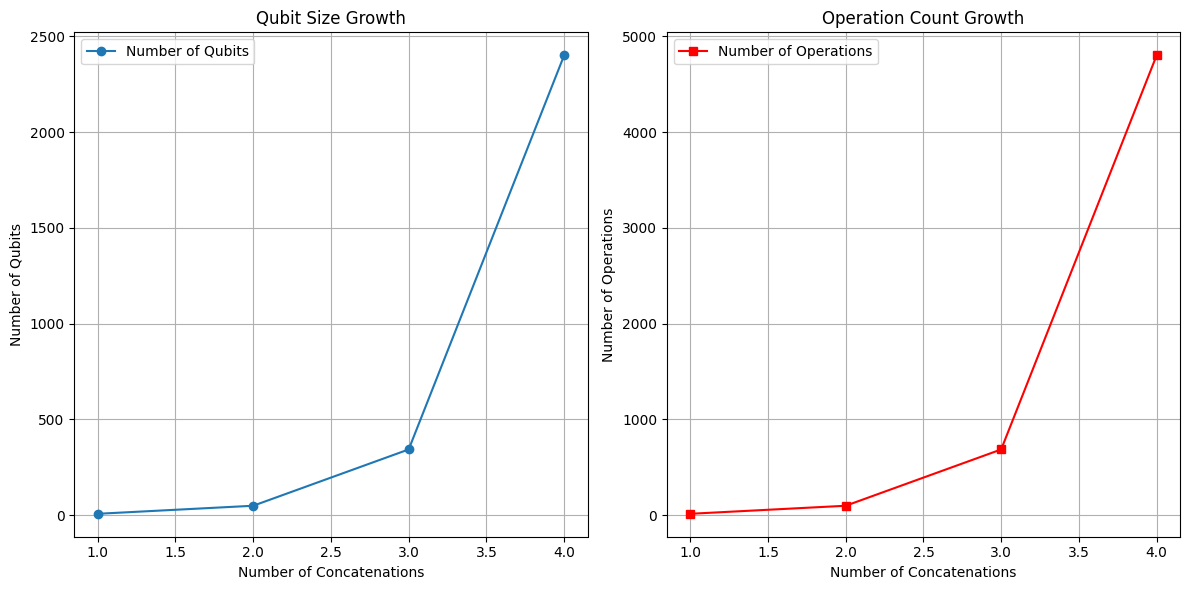

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(xs, ysq, marker='o', label='Number of Qubits')
plt.xlabel('Number of Concatenations')
plt.ylabel('Number of Qubits')
plt.title('Qubit Size Growth')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(xs, ysg, marker='s', color='r', label='Number of Operations')
plt.xlabel('Number of Concatenations')
plt.ylabel('Number of Operations')
plt.title('Operation Count Growth')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

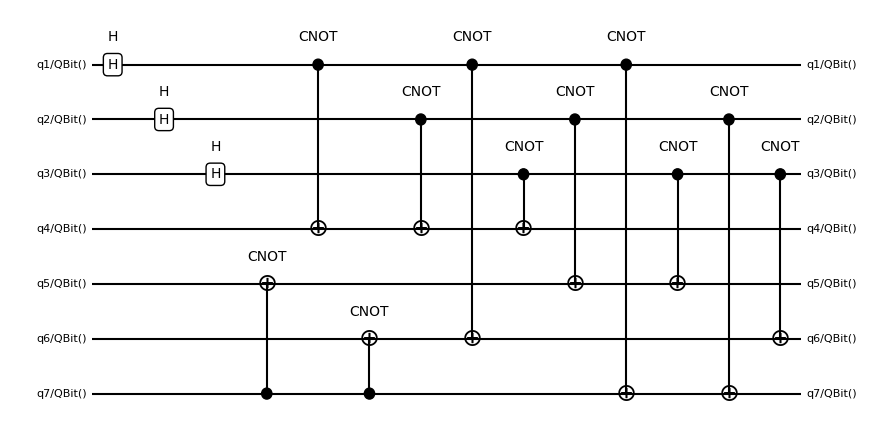

In [12]:
from qualtran.drawing import get_musical_score_data, draw_musical_score
msd = get_musical_score_data(Steane().decompose_bloq())
fig, ax = draw_musical_score(msd)
fig.set_figwidth(9)

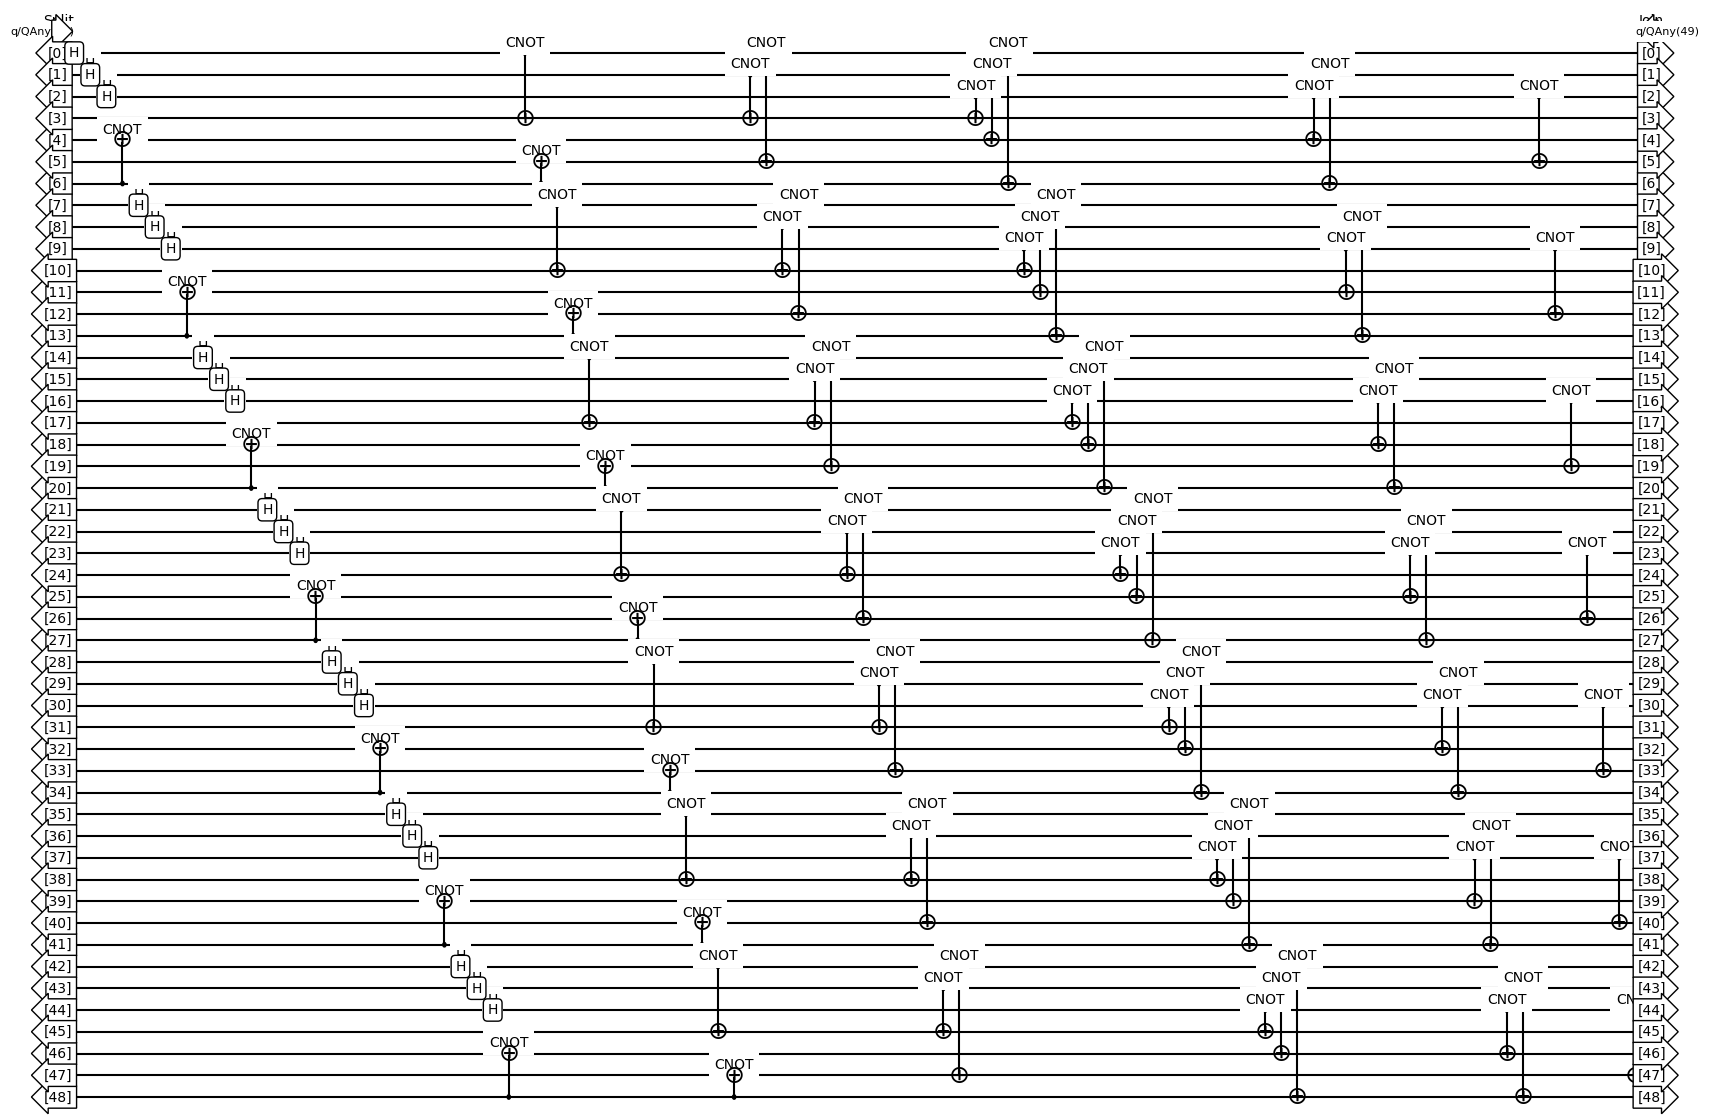

In [13]:
msd = get_musical_score_data(SteaneConcat(n=49).decompose_bloq())
fig, ax = draw_musical_score(msd)
fig.set_figwidth(18)
fig.set_figheight(12)

In [14]:
import cirq
from qualtran.cirq_interop import BloqAsCirqGate
from qualtran._infra.gate_with_registers import get_named_qubits

In [15]:
steane = Steane()
gate = BloqAsCirqGate(steane)
quregs = get_named_qubits(gate.signature)
quregs = cirq.LineQubit.range(7)
op = gate.on(*quregs)
circuit = cirq.Circuit(op)
op = next(circuit.all_operations())
circuit = cirq.Circuit(cirq.decompose_once(op))

qs = cirq.LineQubit.range(7,13)

circuit += cirq.Circuit([cirq.CNOT(quregs[0], qs[0]), cirq.CNOT(quregs[2], qs[0]), cirq.CNOT(quregs[4],qs[0]), cirq.CNOT(quregs[6],qs[0])])
circuit += cirq.Circuit([cirq.CNOT(quregs[0], qs[1]), cirq.CNOT(quregs[1], qs[1]), cirq.CNOT(quregs[4],qs[1]), cirq.CNOT(quregs[5],qs[1])])
circuit += cirq.Circuit([cirq.CNOT(quregs[3], qs[2]), cirq.CNOT(quregs[2], qs[2]), cirq.CNOT(quregs[1],qs[2]), cirq.CNOT(quregs[0],qs[2])])

circuit += cirq.Circuit(
    [
        cirq.H(qs[3]),
        cirq.CNOT(qs[3], quregs[0]),
        cirq.CNOT(qs[3], quregs[2]),
        cirq.CNOT(qs[3], quregs[4]),
        cirq.CNOT(qs[3], quregs[6]),
        cirq.H(qs[3]),
    ]
)

circuit += cirq.Circuit(
    [
        cirq.H(qs[4]),
        cirq.CNOT(qs[4], quregs[0]),
        cirq.CNOT(qs[4], quregs[1]),
        cirq.CNOT(qs[4], quregs[4]),
        cirq.CNOT(qs[4], quregs[5]),
        cirq.H(qs[4]),
    ]
)

circuit += cirq.Circuit(
    [
        cirq.H(qs[5]),
        cirq.CNOT(qs[5], quregs[3]),
        cirq.CNOT(qs[5], quregs[2]),
        cirq.CNOT(qs[5], quregs[1]),
        cirq.CNOT(qs[5], quregs[0]),
        cirq.H(qs[5]),
    ]
)

circuit = cirq.Circuit(circuit, [cirq.measure(qs[i], key=f"q{i}") for i in range(13-7)])

# circuit = cirq.Circuit(circuit, [cirq.H(qs[3]),cirq.CNOT(quregs[3], qs[3]), cirq.CNOT(quregs[4], qs[3]), cirq.CNOT(quregs[6],qs[3]), cirq.H(qs[3])])

#circuit = cirq.Circuit(circuit, [cirq.measure(qs[i], key=f"q{i}") for i in range(7,13)])
#circuit = cirq.Circuit(circuit, [cirq.measure(qs[3])])
print(circuit)

               ┌──┐   ┌───┐   ┌──┐                       ┌────────┐               ┌────────┐
0: ────H───@─────@───────@───────────────@────────────────@────────────────────────────────────────────@─────────────X─────────────────────────────X─────────────────────────────────────────X─────────────────
           │     │       │               │                │                                            │             │                             │                                         │
1: ────H───┼────@┼──────@┼──────@────────┼────────────────┼───────────@────────────────────────────@───┼─────────────┼─────────────────────────────┼───X─────────────────────────────────X───┼─────────────────
           │    ││      ││      │        │                │           │                            │   │             │                             │   │                                 │   │
2: ────H───┼────┼┼─────@┼┼─────@┼────@───┼───@────────────┼───────────┼────────────────────────@───┼───┼─────

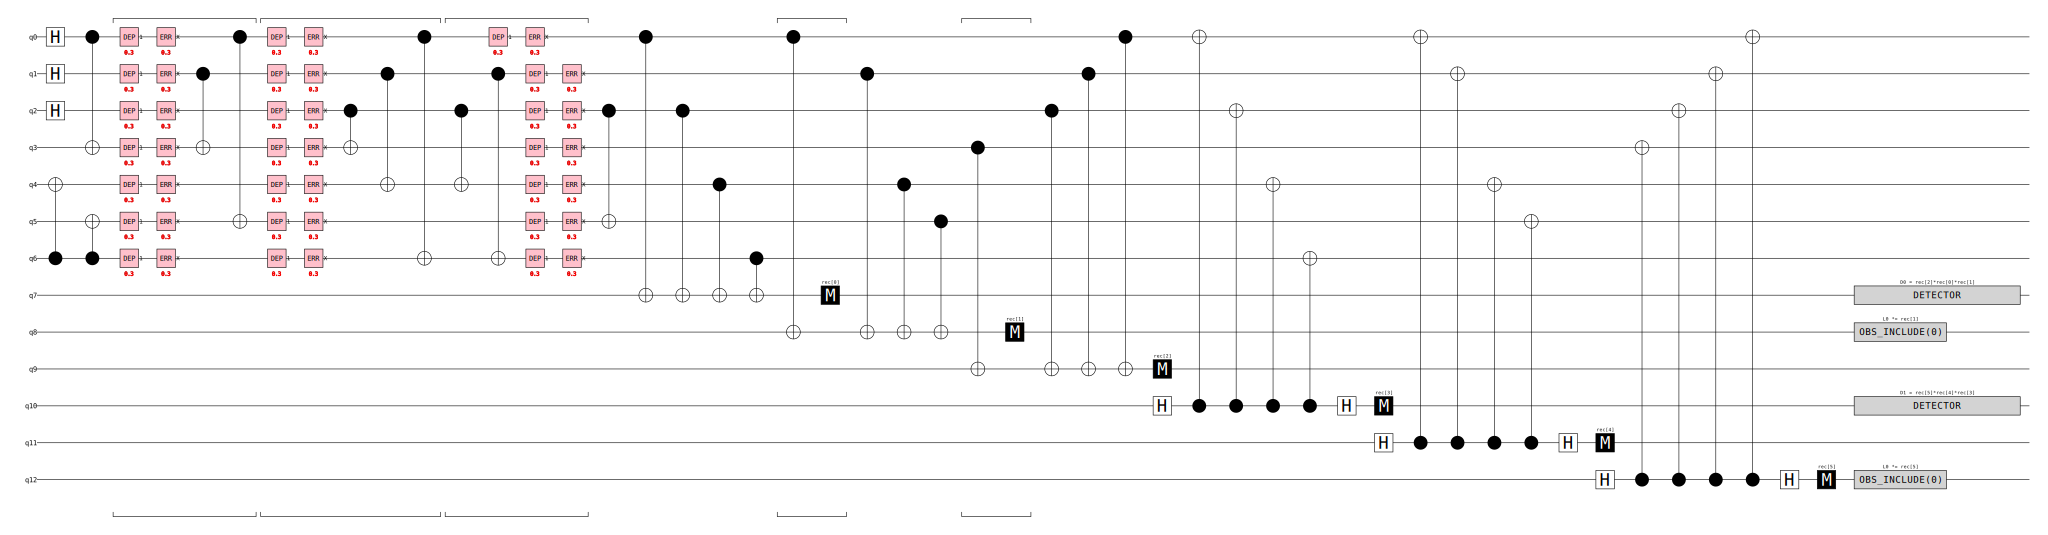

In [16]:
dep_prob = 0.3
flip_prob = 0.3

def make_steane_code(circuit, dep_prob:float=0.3, flip_prob:float=0.3):
  scirc = stimcirq.cirq_circuit_to_stim_circuit(circuit)

  scirc.append("DETECTOR", [stim.target_rec(-4), stim.target_rec(-6),stim.target_rec(-5)])
  scirc.append("DETECTOR", [stim.target_rec(-1),stim.target_rec(-2),stim.target_rec(-3)])
  scirc.append("OBSERVABLE_INCLUDE", [stim.target_rec(-1)], 0)
  scirc.append("OBSERVABLE_INCLUDE", [stim.target_rec(-5)], 0)

  scirc.insert(10,stim.CircuitInstruction("X_ERROR", list(range(7)), [flip_prob]))
  scirc.insert(10,stim.CircuitInstruction("DEPOLARIZE1", list(range(7)), [dep_prob]))

  scirc.insert(7,stim.CircuitInstruction("X_ERROR", list(range(7)), [flip_prob]))
  scirc.insert(7,stim.CircuitInstruction("DEPOLARIZE1", list(range(7)), [dep_prob]))

  scirc.insert(5,stim.CircuitInstruction("X_ERROR", list(range(7)), [flip_prob]))
  scirc.insert(5,stim.CircuitInstruction("DEPOLARIZE1", list(range(7)), [dep_prob]))


  return scirc

scirc = make_steane_code(circuit)
scirc.diagram('timeline-svg')

In [17]:
sampler = scirc.compile_sampler()
sampler.sample(10)

array([[False, False, False,  True,  True, False],
       [ True, False, False,  True, False,  True],
       [ True, False, False,  True,  True,  True],
       [False, False,  True, False, False, False],
       [False,  True,  True, False, False,  True],
       [ True, False,  True, False, False,  True],
       [ True,  True,  True,  True,  True, False],
       [False, False,  True,  True, False, False],
       [False, False,  True,  True,  True,  True],
       [ True,  True,  True,  True, False, False]])

In [18]:
import numpy as np
import pymatching

def count_logical_errors(circuit: stim.Circuit, num_shots: int) -> int:
    sampler = circuit.compile_detector_sampler()
    detection_events, observable_flips = sampler.sample(num_shots, separate_observables=True)

    detector_error_model = circuit.detector_error_model(decompose_errors=True)
    matcher = pymatching.Matching.from_detector_error_model(detector_error_model)

    predictions = matcher.decode_batch(detection_events)

    num_errors = 0
    for shot in range(num_shots):
        actual_for_shot = observable_flips[shot]
        predicted_for_shot = predictions[shot]
        if not np.array_equal(actual_for_shot, predicted_for_shot):
            num_errors += 1
    return num_errors

In [19]:
count_logical_errors(scirc, 100)

55

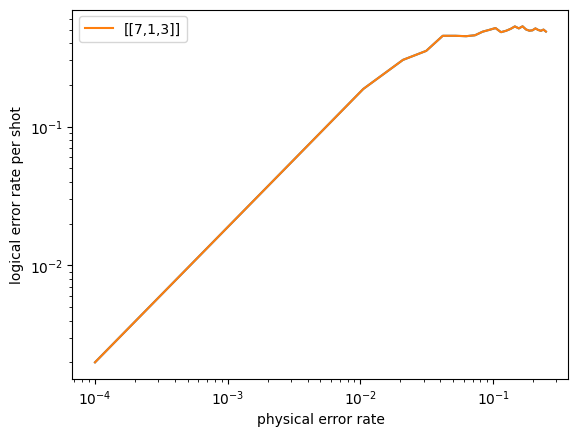

In [20]:
import matplotlib.pyplot as plt

num_shots = 1000
xs = []
ys=[]

for noise in np.linspace(.0001, 0.25, 25):
    circ = make_steane_code(circuit, noise, noise)
    num_errors_sampled = count_logical_errors(circ, num_shots)
    xs.append(noise)
    ys.append(num_errors_sampled / num_shots)
plt.loglog(xs, ys)
plt.plot(xs, ys, label="[[7,1,3]]")
plt.xlabel("physical error rate")
plt.ylabel("logical error rate per shot")
plt.legend()
plt.show()

In [21]:
import sinter

tasks = [
    sinter.Task(
        circuit = make_steane_code(circuit, noise, noise),
        json_metadata={'d': "Steane",'p': noise},
    )
    for noise in [0.05, 0.08, 0.1, 0.2, 0.3, 0.4, 0.5]
]

collected_stats = sinter.collect(
    num_workers=10,
    tasks=tasks,
    decoders=['pymatching'],
    max_shots=10,
    max_errors=100,
)

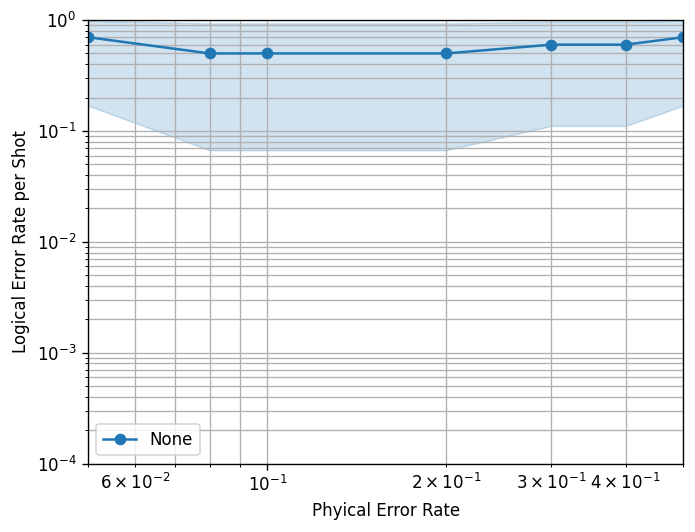

In [22]:
fig, ax = plt.subplots(1, 1)
sinter.plot_error_rate(
    ax=ax,
    stats=collected_stats,
    x_func=lambda stats: stats.json_metadata['p'],
)
ax.set_ylim(1e-4, 1e-0)
ax.set_xlim(5e-2, 5e-1)
ax.loglog()
ax.set_xlabel("Phyical Error Rate")
ax.set_ylabel("Logical Error Rate per Shot")
ax.grid(which='major')
ax.grid(which='minor')
ax.legend()
fig.set_dpi(120)

In [23]:
'''
The concatenated plot will be computed similarly to the first one, but in a hierarchi manner:

detect and correct errors in all the Steane codes at the first level of concatenation (7 times in parallel)
detect and correct errors in the second level
For point-2 you will need logical CNOTs, which effectively will be formed from transversal CNOTs on the wires of the lower codes. For example, there will be 4 logical CNOTs in each syndrome measurement which is equal to 4*7=28 lower level CNOTs.

'''

steane = SteaneConcat(n=49)
gate = BloqAsCirqGate(steane)
quregs = get_named_qubits(gate.signature)
quregs = cirq.LineQubit.range(49)
op = gate.on(*quregs)
circuit = cirq.Circuit(op)
op = next(circuit.all_operations())
circuit = cirq.Circuit(cirq.decompose_once(op))
#circuit = cirq.Circuit(circuit, [cirq.measure(quregs[i], key=f"q{i}") for i in range(49)])

qs = cirq.LineQubit.range(49,49+6*7)

# syndrome measuerement
for i in range(7):
    offset = i*7
    circuit += cirq.Circuit(

        [
            cirq.CNOT(quregs[0 + i * 7], qs[i * 6]),
            cirq.CNOT(quregs[2 + i * 7], qs[i * 6]),
            cirq.CNOT(quregs[4 + i * 7], qs[i * 6]),
            cirq.CNOT(quregs[6 + i * 7], qs[i * 6]),
        ]
    )
    circuit += cirq.Circuit(

        [
            cirq.CNOT(quregs[0 + i * 7], qs[i * 6 + 1]),
            cirq.CNOT(quregs[1 + i * 7], qs[i * 6 + 1]),
            cirq.CNOT(quregs[4 + i * 7], qs[i * 6 + 1]),
            cirq.CNOT(quregs[5 + i * 7], qs[i * 6 + 1]),
        ]
    )
    circuit += cirq.Circuit(

        [
            cirq.CNOT(quregs[3 + i * 7], qs[i * 6 + 2]),
            cirq.CNOT(quregs[2 + i * 7], qs[i * 6 + 2]),
            cirq.CNOT(quregs[1 + i * 7], qs[i * 6 + 2]),
            cirq.CNOT(quregs[0 + i * 7], qs[i * 6 + 2]),
        ]
    )


    circuit += cirq.Circuit(
        [
            cirq.H(qs[i * 6 + 3]),
            cirq.CNOT(qs[i * 6 + 3], quregs[0 + i * 7]),
            cirq.CNOT(qs[i * 6 + 3], quregs[2 + i * 7]),
            cirq.CNOT(qs[i * 6 + 3], quregs[4 + i * 7]),
            cirq.CNOT(qs[i * 6 + 3], quregs[6 + i * 7]),
            cirq.H(qs[i * 6 + 3]),
        ]
    )

    circuit += cirq.Circuit(
        [
            cirq.H(qs[i * 6 + 4]),
            cirq.CNOT(qs[i * 6 + 4], quregs[0 + i * 7]),
            cirq.CNOT(qs[i * 6 + 4], quregs[1 + i * 7]),
            cirq.CNOT(qs[i * 6 + 4], quregs[4 + i * 7]),
            cirq.CNOT(qs[i * 6 + 4], quregs[5 + i * 7]),
            cirq.H(qs[i * 6 + 4]),
        ]
    )

    circuit += cirq.Circuit(
        [
            cirq.H(qs[i * 6 + 5]),
            cirq.CNOT(qs[i * 6 + 5], quregs[3 + i * 7]),
            cirq.CNOT(qs[i * 6 + 5], quregs[2 + i * 7]),
            cirq.CNOT(qs[i * 6 + 5], quregs[1 + i * 7]),
            cirq.CNOT(qs[i * 6 + 5], quregs[0 + i * 7]),
            cirq.H(qs[i * 6 + 5]),
        ]
    )

    circuit += cirq.Circuit(

        [cirq.measure(qs[i * 6 + j], key=f"q{i * 6 + j}") for j in range(13 - 7)]
    )

# circuit = cirq.Circuit(circuit, [cirq.H(qs[3]),cirq.CNOT(quregs[3], qs[3]), cirq.CNOT(quregs[4], qs[3]), cirq.CNOT(quregs[6],qs[3]), cirq.H(qs[3])])

#circuit = cirq.Circuit(circuit, [cirq.measure(qs[i], key=f"q{i}") for i in range(7,13)])
#circuit = cirq.Circuit(circuit, [cirq.measure(qs[3])])

print(circuit)


               ┌──┐   ┌───┐   ┌──┐
0: ────H───@─────@───────@───────────────@───────────────@───────────────────────────@───────X───────────────────────X───────────────────────────────────X───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       

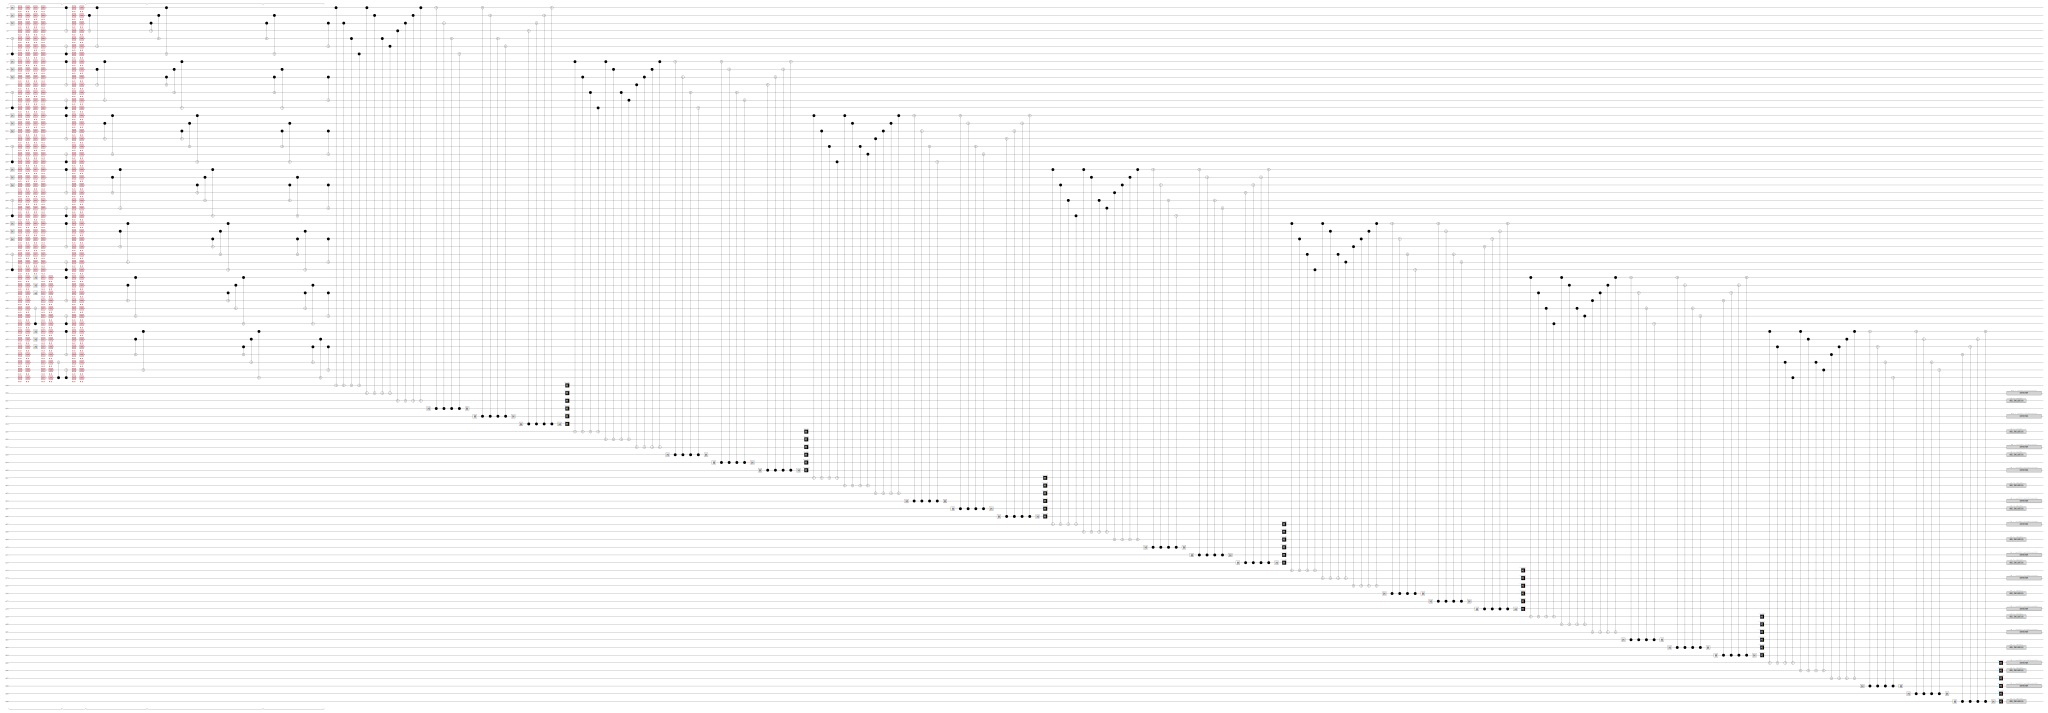

In [24]:
def make_concat_steane_code(circuit, dep_prob:float=0.3, flip_prob:float=0.3):
  scirc = stimcirq.cirq_circuit_to_stim_circuit(circuit)

  #circs = []

  for i in range(6):
    scirc.append("DETECTOR", [stim.target_rec(-4-i*7), stim.target_rec(-6-i*7),stim.target_rec(-5-i*7)])
    scirc.append("DETECTOR", [stim.target_rec(-1-i*7),stim.target_rec(-2-i*7),stim.target_rec(-3-i*7)])
    scirc.append("OBSERVABLE_INCLUDE", [stim.target_rec(-1-i*7)], 0)
    scirc.append("OBSERVABLE_INCLUDE", [stim.target_rec(-5-i*7)], 0)
    # circs.append(scirc)

  scirc.insert(10,stim.CircuitInstruction("X_ERROR", list(range(49)), [flip_prob]))
  scirc.insert(10,stim.CircuitInstruction("DEPOLARIZE1", list(range(49)), [dep_prob]))

  scirc.insert(15,stim.CircuitInstruction("X_ERROR", list(range(49)), [flip_prob]))
  scirc.insert(15,stim.CircuitInstruction("DEPOLARIZE1", list(range(49)), [dep_prob]))

  scirc.insert(20,stim.CircuitInstruction("X_ERROR", list(range(49)), [flip_prob]))
  scirc.insert(20,stim.CircuitInstruction("DEPOLARIZE1", list(range(49)), [dep_prob]))

  return scirc

scirc = make_concat_steane_code(circuit)
scirc.diagram('timeline-svg')

In [27]:
count_logical_errors(scirc, 100)

47

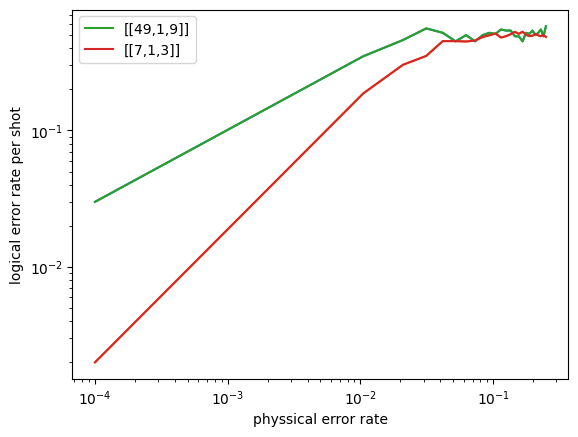

In [26]:
import matplotlib.pyplot as plt

num_shots = 100
xss = []
yss=[]

for noise in np.linspace(.0001, 0.25, 25):
    circ = make_concat_steane_code(circuit, noise, noise)
    num_errors_sampled = count_logical_errors(circ, num_shots)
    xss.append(noise)
    yss.append(num_errors_sampled / num_shots)
plt.loglog(xss, yss)
plt.loglog(xs,ys)
plt.plot(xss, yss, label="[[49,1,9]]")
plt.plot(xs, ys, label="[[7,1,3]]")
plt.xlabel("physsical error rate")
plt.ylabel("logical error rate per shot")
plt.legend()
plt.show()